# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
# Dataset overview
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Class'].value_counts())
print("\nDescriptive statistics:\n", df.describe())

Shape: (284807, 31)

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Descriptive statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.369007e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e

In [11]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [30]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [21]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Dataset Visualization

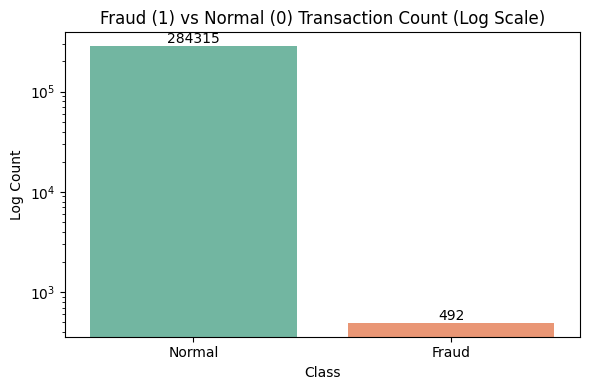

In [41]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Class', palette='Set2')
plt.title("Fraud (1) vs Normal (0) Transaction Count (Log Scale)")
plt.xlabel("Class")
plt.ylabel("Log Count")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.yscale('log')  # Use log scale to make small values visible

# Annotate counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

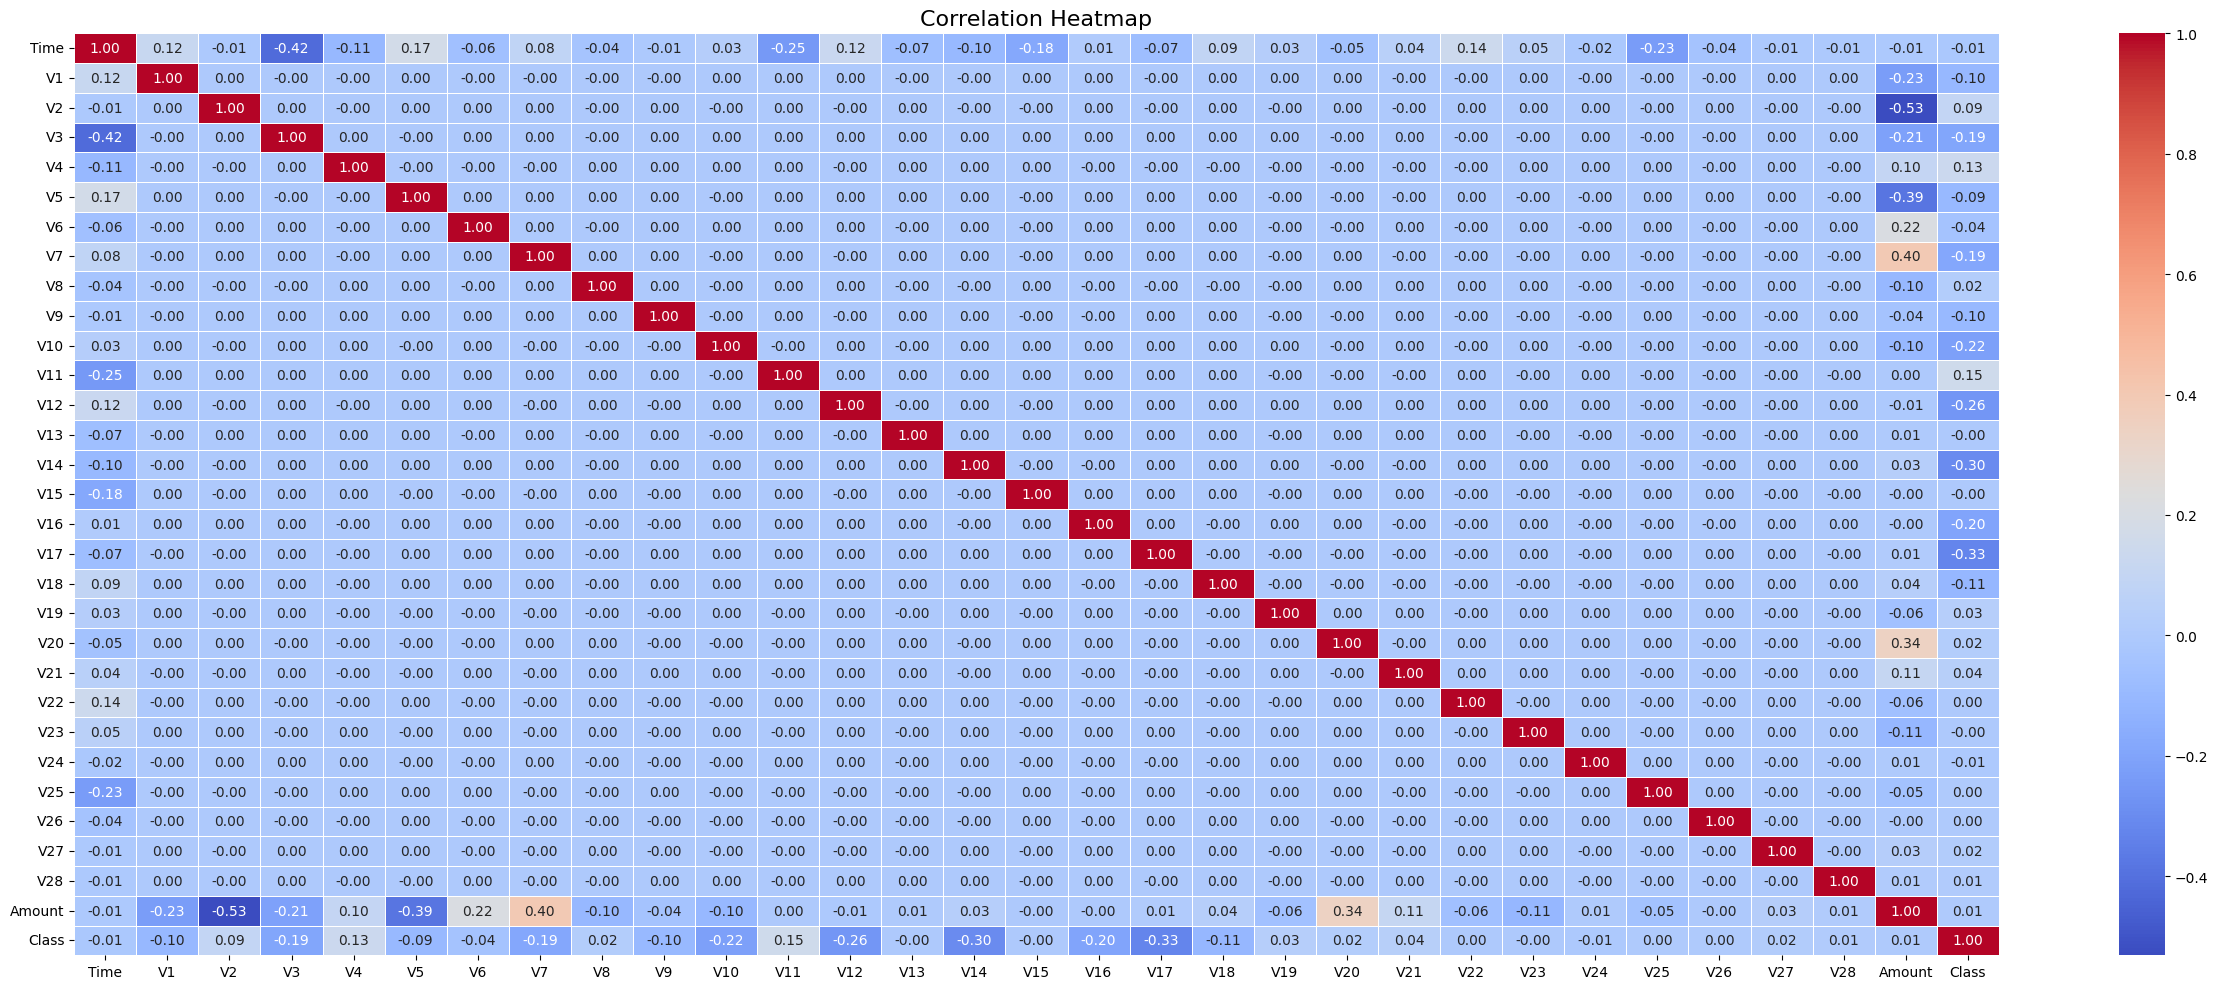

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Reset to default style (ensures white background)
plt.style.use('default')

plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


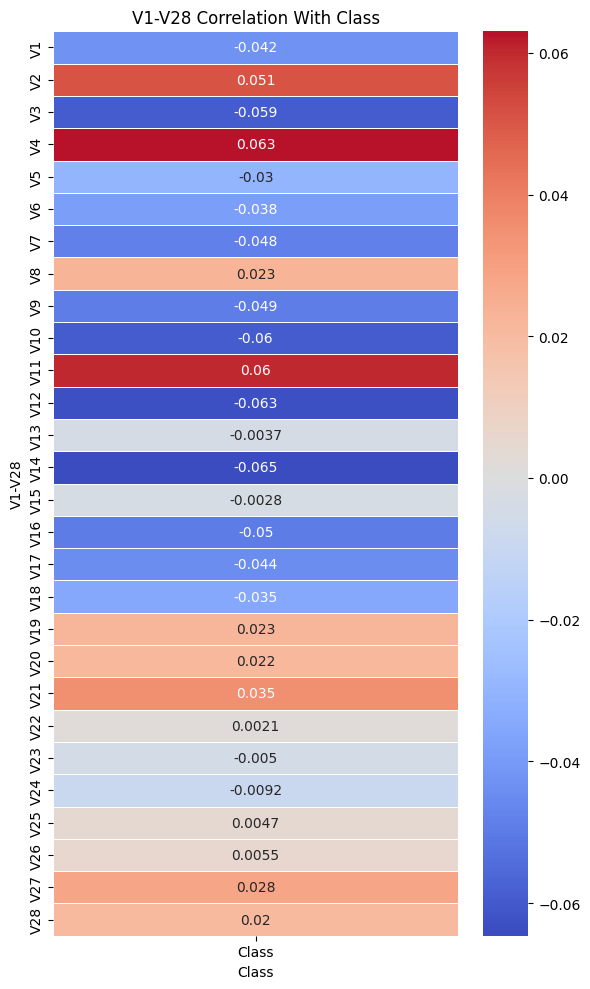

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_columns = [f"V{i}" for i in range(1, 29)]
corr_matrix = df[pca_columns + ['Class']].corr(method='spearman')

# Drop NaNs that may appear in correlation with 'Class'
corr_with_class = corr_matrix[['Class']].drop('Class')
corr_with_class = corr_with_class.dropna()

plt.figure(figsize=(6, 10))
sns.heatmap(corr_with_class, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("V1-V28 Correlation With Class")
plt.xlabel("Class")
plt.ylabel("V1-V28")
plt.tight_layout()
plt.show()

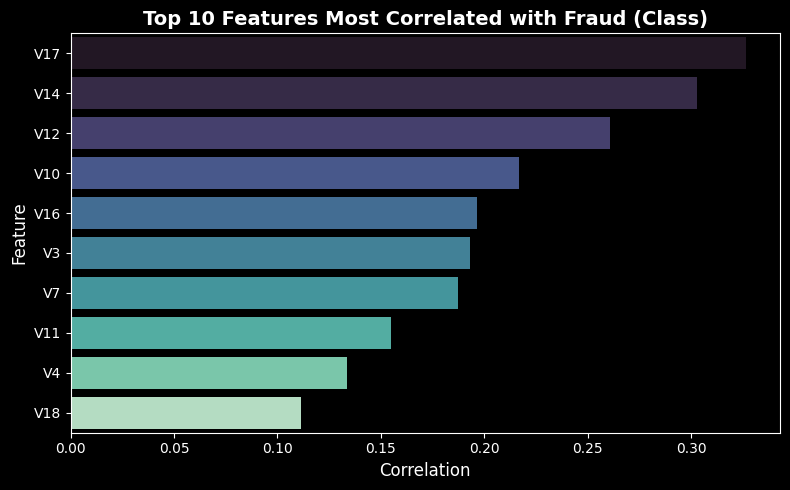

In [23]:
corr = df.corr(numeric_only=True)
cor_target = abs(corr['Class']).sort_values(ascending=False)[1:11]
plt.figure(figsize=(8, 5))
sns.barplot(x=cor_target.values, y=cor_target.index, palette='mako')
plt.title('Top 10 Features Most Correlated with Fraud (Class)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

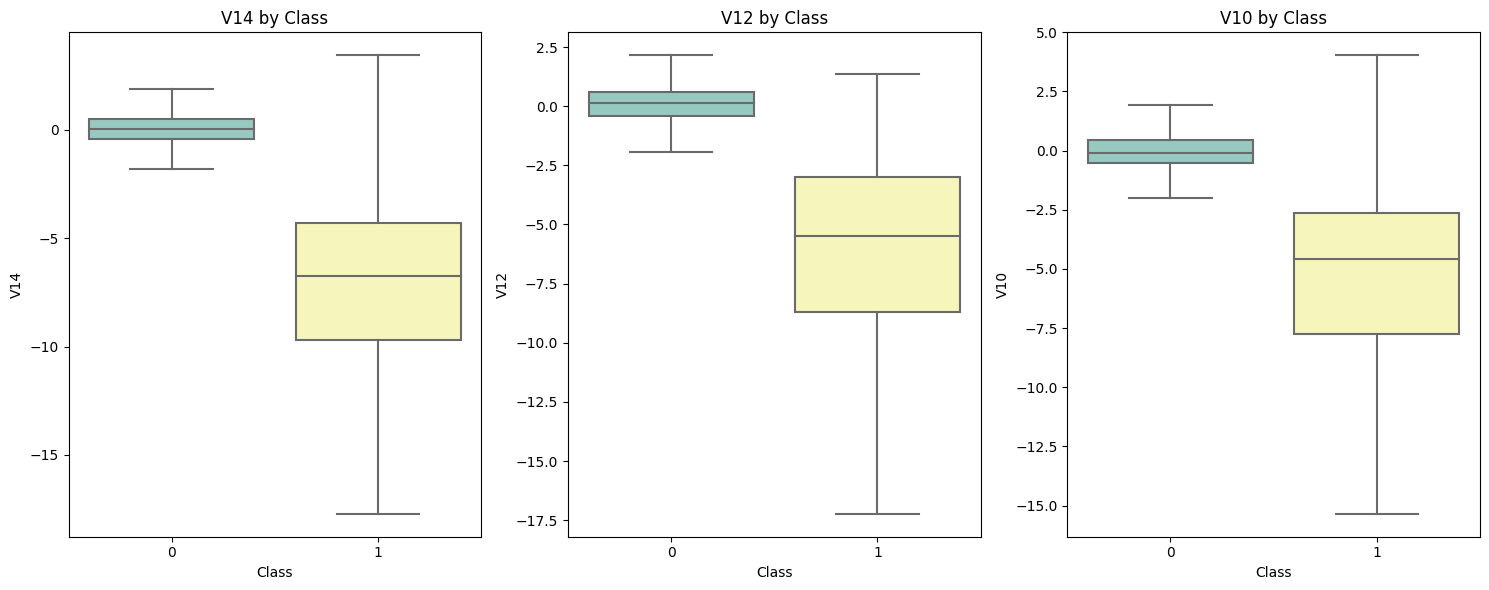

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['V14', 'V12', 'V10']  # These often show strong fraud signal
plt.figure(figsize=(15, 6))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Class', y=feature, data=df, palette='Set3', showfliers=False)
    plt.title(f"{feature} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

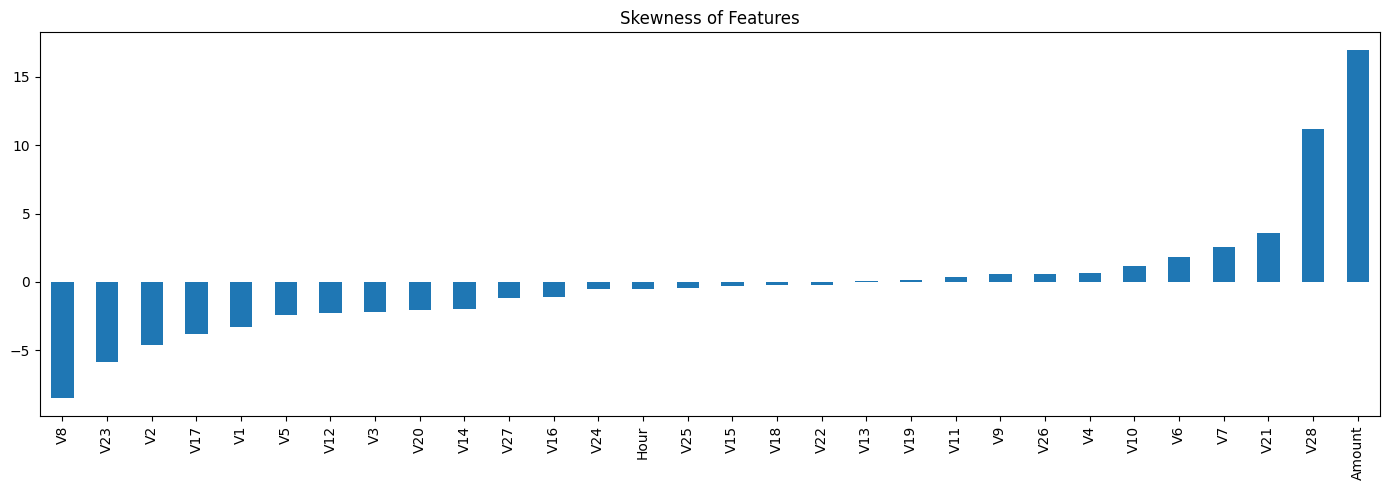

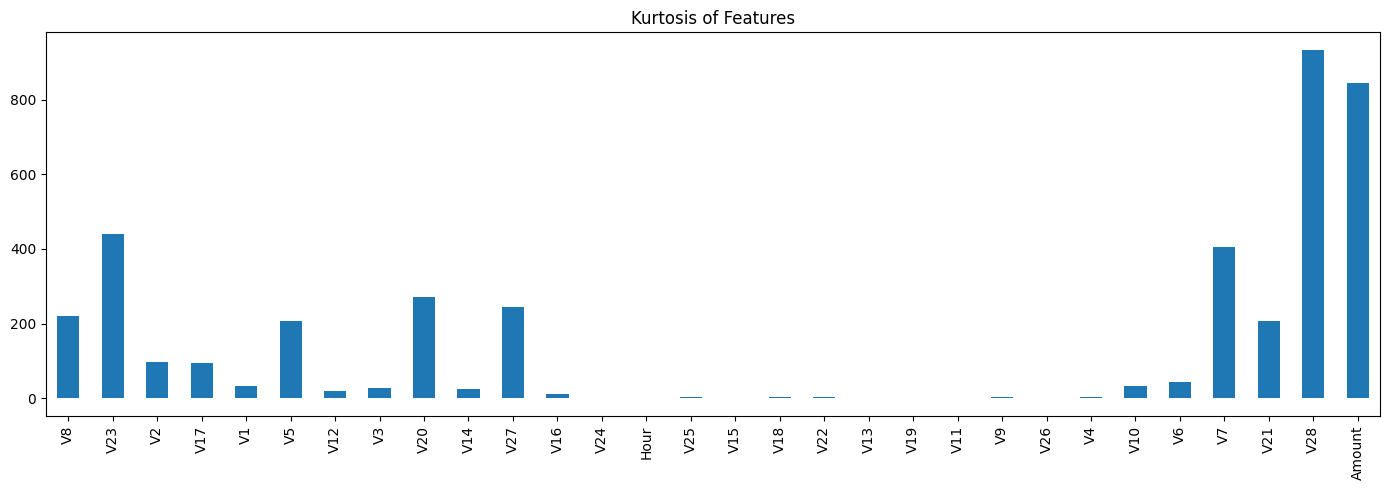

In [47]:
skew_kurt_df = df.drop(columns=['Class', 'Time']).agg(['skew', 'kurtosis']).T
skew_kurt_df = skew_kurt_df.sort_values(by='skew')

plt.figure(figsize=(14, 5))
skew_kurt_df['skew'].plot(kind='bar', title='Skewness of Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
skew_kurt_df['kurtosis'].plot(kind='bar', title='Kurtosis of Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

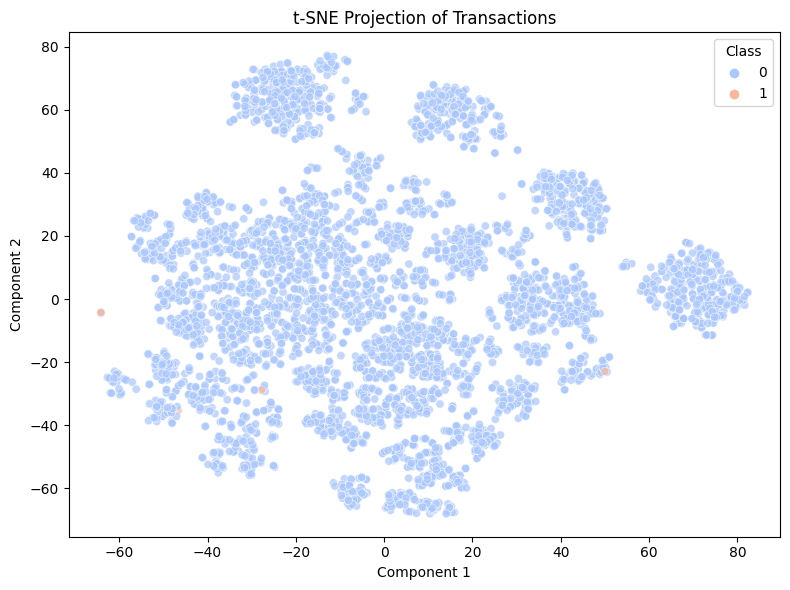

In [48]:
# Subset and normalize
sample_df = df.sample(5000, random_state=1)  # Downsample for performance
X = sample_df.drop(['Class', 'Time'], axis=1)
y = sample_df['Class']

X_scaled = StandardScaler().fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("t-SNE Projection of Transactions")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()